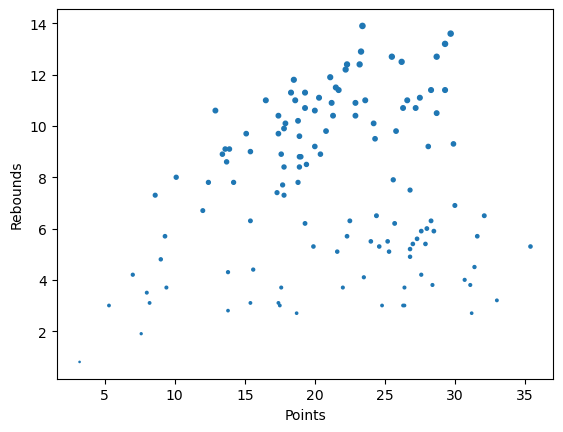

In [5]:
import matplotlib.pylab as plt
rebounds = df['TRB'].values
points = df['PTS'].values

plt.scatter(points, rebounds, s=rebounds)
plt.xlabel('Points')
plt.ylabel('Rebounds')
plt.show()

Duration: 240.0 seconds


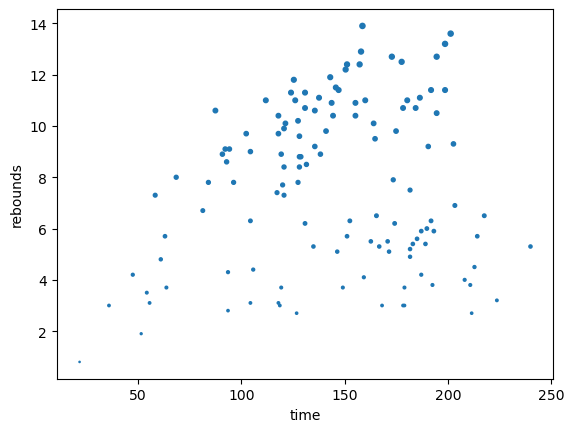

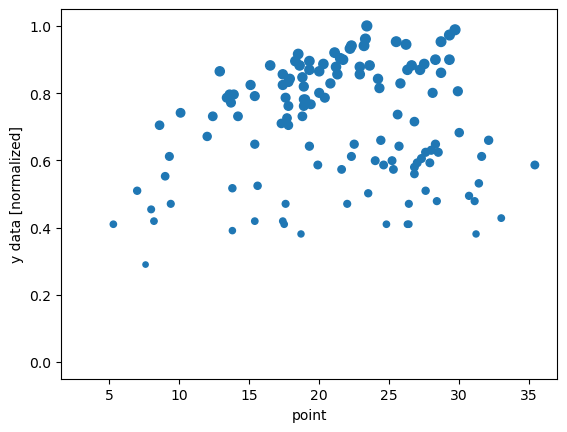

Resolution: 23 notes


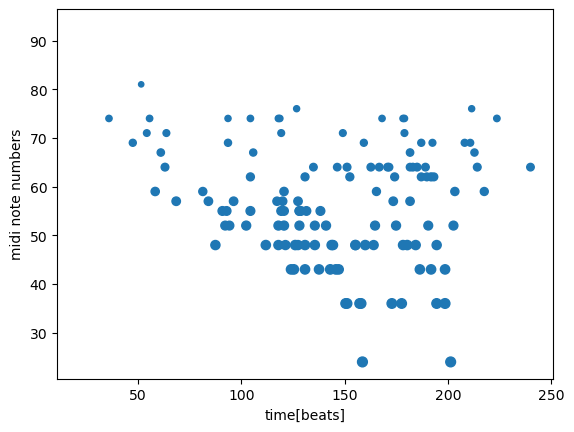

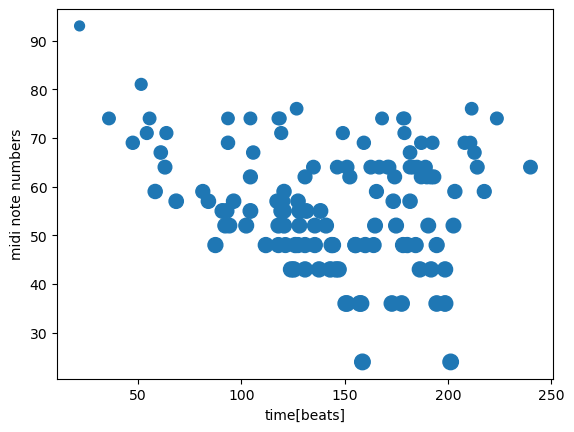

In [6]:
import matplotlib.pylab as plt
from audiolazy import str2midi
from midiutil import MIDIFile
import pandas as pd

fileName = 'Players'
df = pd.read_csv(fileName + '.csv')

n_total = len(df)
def map_value(value,min_value,max_value,min_result,max_result):
    result = min_result + (value - min_value)/(max_value-min_value)*(max_result - min_result)
    return result

duration_beats = 240
t_data = map_value(points, 0, max(points), 0, duration_beats)

bpm = 60
duration_sec = duration_beats*60/bpm
print('Duration:', duration_sec, 'seconds')

plt.scatter(t_data, rebounds, s=rebounds)
plt.xlabel('time')
plt.ylabel('rebounds')
plt.show()

y_data = map_value(rebounds, min(rebounds), max(rebounds), 0, 1)

y_scale = 0.5

y_data = y_data**y_scale

plt.scatter(points, y_data, s=50*y_data)
plt.xlabel('point')
plt.ylabel('y data [normalized]')
plt.show()


note_names = ['C1','C2','G2',
             'C3','E3','G3','A3','B3',
             'D4','E4','G4','A4','B4',
             'D5','E5','G5','A5','B5',
             'D6','E6','F#6','G6','A6']

note_midis = [str2midi(n) for n in note_names]
n_notes = len(note_midis)
print("Resolution:", n_notes, 'notes')

midi_data = []
for i in range(n_total):
    note_index = round(map_value(y_data[i], 0, 1, n_notes - 1, 0))
    
    midi_data.append(note_midis[note_index])
    
plt.scatter(t_data, midi_data, s=50*y_data)
plt.xlabel('time[beats]')
plt.ylabel('midi note numbers')
plt.show()

vel_min, vel_max = 50, 125

vel_data = []
for i in range(n_total):
    note_velocity = round(map_value(y_data[i], 0, 1, vel_min, vel_max))
    
    vel_data.append(note_velocity)

plt.scatter(t_data, midi_data, s=vel_data)
plt.xlabel('time[beats]')
plt.ylabel('midi note numbers')
plt.show()

filename = 'Final_2'

my_midi_file = MIDIFile(1)
my_midi_file.addTempo(track=0, time=0, tempo=bpm)

for i in range(n_total):
    my_midi_file.addNote(track=0, channel=0, pitch=midi_data[i], time=t_data[i], duration=1, volume=vel_data[i])
    
with open(filename + '.mid', "wb") as f:
    my_midi_file.writeFile(f)